# Support Vector Machines
É um algoritmo supervisionado que busca traçar uma reta no hiperplano para separá-lo em duas áreas, cada uma correspondendo a uma das duas classes possíveis.

In [1]:
import aux
from sklearn.svm import LinearSVC


# Carregar os datasets
og_df, pca_df, pearson_df = aux.get_datasets()

# Preparar listas para comparação
auc_values = []
f1_score_values = []

### Dataset Original

In [2]:
og_X_train, og_X_test, og_y_train, og_y_test = aux.prepare_dataset(og_df)

In [3]:
linear_svc = LinearSVC(dual="auto", max_iter=100000)
linear_svc.fit(og_X_train, og_y_train)

# Vamos predizer o modelo para a classe de teste
y_pred = linear_svc.predict(og_X_test)

auc, f1 = aux.analyse_ml_results(og_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7265, Falsos Não-Ataques: 5
Falsos Ataques: 124, Verdadeiros Não-Ataques: 7111
AUC: 0.991
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      7270
           1       1.00      0.98      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por Pearson

In [4]:
pearson_X_train, pearson_X_test, pearson_y_train, pearson_y_test = aux.prepare_dataset(pearson_df)

In [5]:
linear_svc = LinearSVC(dual="auto", max_iter=100000)
linear_svc.fit(pearson_X_train, pearson_y_train)

# Vamos predizer o modelo para a classe de teste
y_pred = linear_svc.predict(pearson_X_test)

auc, f1 = aux.analyse_ml_results(pearson_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7096, Falsos Não-Ataques: 174
Falsos Ataques: 748, Verdadeiros Não-Ataques: 6487
AUC: 0.936
              precision    recall  f1-score   support

          -1       0.90      0.98      0.94      7270
           1       0.97      0.90      0.93      7235

    accuracy                           0.94     14505
   macro avg       0.94      0.94      0.94     14505
weighted avg       0.94      0.94      0.94     14505



### Dataset Reduzido por PCA

In [6]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = aux.prepare_dataset(pca_df)

In [7]:
linear_svc = LinearSVC(dual="auto", max_iter=100000)
linear_svc.fit(pca_X_train, pca_y_train)

# Vamos predizer o modelo para a classe de teste
y_pred = linear_svc.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7192, Falsos Não-Ataques: 78
Falsos Ataques: 195, Verdadeiros Não-Ataques: 7040
AUC: 0.981
              precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98      7270
         1.0       0.99      0.97      0.98      7235

    accuracy                           0.98     14505
   macro avg       0.98      0.98      0.98     14505
weighted avg       0.98      0.98      0.98     14505



Comparando os três métodos, temos:

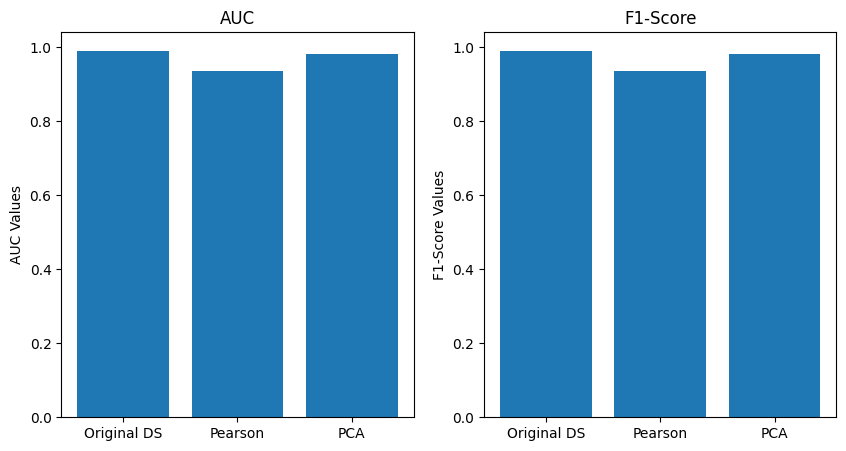

In [8]:
aux.plot_auc_and_f1(auc_values, f1_score_values)